In [1]:
import requests
import json
import pandas as pd
import scipy as sc
%matplotlib inline
from masterscrap import masterscrap
import numpy as np

In [2]:
conseil_dict = {
    "Ignazio Cassis" : 2664,
    "Doris Leuthard" : 2510,
    "Ueli Maurer" : 2310,
    "Johann Schneider-Ammann" : 2530,
    "Christoph Blocher" : 2017,
    "Guy Parmelin" : 2621,
    "Didier Burkhalter" : 2589,
    
}
nb_pages = 10

In [3]:
def fetch_factions(id_):
    url = "http://ws-old.parlament.ch/factions/" + str(id_)
    print(url)
    params = {
        'format':'json'}
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
    }
    resp = requests.get(url=url, params=params, headers=headers)
    return resp

In [4]:
r = fetch_factions(4)

http://ws-old.parlament.ch/factions/4


In [5]:
j = r.json()

In [6]:
list_factions = [4, 2, 1, 6]

In [7]:
total_list = {}
party_dict = {}
for id_ in list_factions:
    r = fetch_factions(id_)
    print (r.status_code)
    j = r.json()
    dict_ = {member['firstName'] + " " + member['lastName'] : member['number'] for member in j['members']}
    partyy = {member['number'] : id_ for member in j['members']}
    party_dict.update(partyy)
    total_list.update(dict_)

http://ws-old.parlament.ch/factions/4
200
http://ws-old.parlament.ch/factions/2
200
http://ws-old.parlament.ch/factions/1
200
http://ws-old.parlament.ch/factions/6
200


In [8]:
len(total_list)
total_list

{'Ada Marra': 2726,
 'Adrian Amstutz': 2584,
 'Adèle Thorens Goumaz': 2710,
 'Albert Rösti': 3010,
 'Albert Vitali': 2761,
 'Alex Kuprecht': 2641,
 'Alexander Tschäppät': 2328,
 'Alfred Heer': 2690,
 'Alice Glauser-Zufferey': 2686,
 'Andrea Caroni': 2775,
 'Andrea Martina Geissbühler': 2683,
 'Andreas Aebi': 2670,
 'Andreas Glarner': 3074,
 'Angelo Barrile': 3104,
 'Anita Fetz': 2061,
 'Balthasar Glättli': 3003,
 'Barbara Gysi': 3026,
 'Barbara Keller-Inhelder': 3081,
 'Barbara Steinemann': 3096,
 'Bastien Girod': 2685,
 'Bea Heim': 2601,
 'Beat Arnold': 3057,
 'Beat Jans': 2745,
 'Beat Walti': 3044,
 'Benoît Genecand': 3073,
 'Bruno Pezzatti': 2784,
 'Bruno Walliser': 3099,
 'Carlo Sommaruga': 2632,
 'Chantal Galladé': 2597,
 'Christa Markwalder': 2614,
 'Christian Imark': 3080,
 'Christian Levrat': 2613,
 'Christian Lüscher': 2698,
 'Christian Wasserfallen': 2715,
 'Christine Häsler': 3051,
 'Christoph Eymann': 2287,
 'Claude Hêche': 2719,
 'Claude Janiak': 2501,
 'Claudia Friedl': 3

In [ ]:
nb_pages = 5
df = masterscrap(total_list , nb_pages)

In [ ]:
df.to_pickle("parlement_votes_5pages.pkl")

In [9]:
df = pd.read_pickle("parlement_votes_5pages.pkl")

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, df):
    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()
    G.position = {}

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    
    # draw graph
    pos=nx.spring_layout(G)
    color_map = []
    ids = df.columns.values
    for node in G:
        if node in ids:
            color_map.append('blue')
        else: 
            color_map.append('green')  
    nx.draw(G, pos, node_color=color_map)

    # show graph
    plt.show()

In [11]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [12]:
# draw example
edges = []
for c in df:
    votes = df[c]
    edges += [(c, id_) for id_ in df.index.tolist() if votes.loc[id_] == 'Yes']

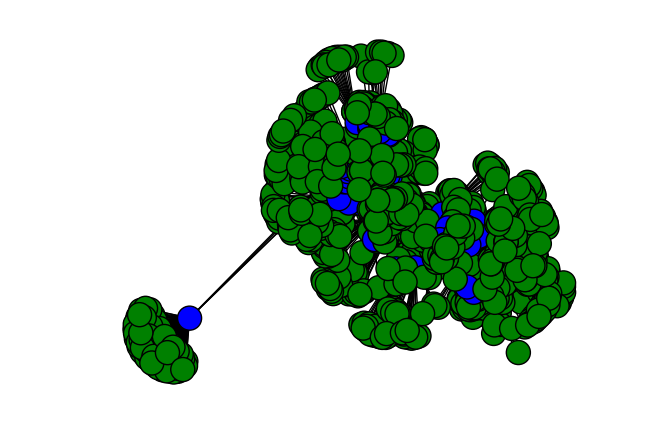

In [13]:
# draw example
draw_graph(edges, df)

In [14]:
from sklearn.decomposition import NMF

In [15]:
to_replace = {'Yes':2, 'No':1, 'P':0, 'EH':0, 'ES':0, 'NT':0}
clean_df = df.replace(to_replace)
clean_df = clean_df.fillna(0)
clean_df

,3055,2670,2758,2796,2584,3057,2772,2372,2740,3062,...,3068,3072,2685,3003,2569,3051,3086,3000,2654,2710
17496,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
17983,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
17209,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
16362,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
17533,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
17534,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
17815,2.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
17816,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
17910,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0
17911,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0


In [16]:
#total_list.values()
intersection = [i for i in clean_df.columns if i in total_list.values()]
len(intersection)

good_dict = {k: v for k, v in total_list.items() if v in intersection}
len(good_dict)

good_dict

{'Ada Marra': 2726,
 'Adrian Amstutz': 2584,
 'Adèle Thorens Goumaz': 2710,
 'Albert Rösti': 3010,
 'Albert Vitali': 2761,
 'Alexander Tschäppät': 2328,
 'Alfred Heer': 2690,
 'Alice Glauser-Zufferey': 2686,
 'Andrea Caroni': 2775,
 'Andrea Martina Geissbühler': 2683,
 'Andreas Aebi': 2670,
 'Andreas Glarner': 3074,
 'Angelo Barrile': 3104,
 'Balthasar Glättli': 3003,
 'Barbara Gysi': 3026,
 'Barbara Keller-Inhelder': 3081,
 'Barbara Steinemann': 3096,
 'Bastien Girod': 2685,
 'Bea Heim': 2601,
 'Beat Arnold': 3057,
 'Beat Jans': 2745,
 'Beat Walti': 3044,
 'Benoît Genecand': 3073,
 'Bruno Pezzatti': 2784,
 'Bruno Walliser': 3099,
 'Carlo Sommaruga': 2632,
 'Chantal Galladé': 2597,
 'Christa Markwalder': 2614,
 'Christian Imark': 3080,
 'Christian Levrat': 2613,
 'Christian Lüscher': 2698,
 'Christian Wasserfallen': 2715,
 'Christine Häsler': 3051,
 'Christoph Eymann': 2287,
 'Claude Janiak': 2501,
 'Claudia Friedl': 3035,
 'Claudio Zanetti': 3101,
 'Corina Eichenberger-Walther': 2678,

## Sparse version

In [17]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [18]:
clean_df.shape

(1718, 170)

In [19]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [20]:
H.shape

(2, 170)

In [21]:
W.shape

(1718, 2)

In [22]:
total_list['Jean-Luc Addor']
good_dict

{'Ada Marra': 2726,
 'Adrian Amstutz': 2584,
 'Adèle Thorens Goumaz': 2710,
 'Albert Rösti': 3010,
 'Albert Vitali': 2761,
 'Alexander Tschäppät': 2328,
 'Alfred Heer': 2690,
 'Alice Glauser-Zufferey': 2686,
 'Andrea Caroni': 2775,
 'Andrea Martina Geissbühler': 2683,
 'Andreas Aebi': 2670,
 'Andreas Glarner': 3074,
 'Angelo Barrile': 3104,
 'Balthasar Glättli': 3003,
 'Barbara Gysi': 3026,
 'Barbara Keller-Inhelder': 3081,
 'Barbara Steinemann': 3096,
 'Bastien Girod': 2685,
 'Bea Heim': 2601,
 'Beat Arnold': 3057,
 'Beat Jans': 2745,
 'Beat Walti': 3044,
 'Benoît Genecand': 3073,
 'Bruno Pezzatti': 2784,
 'Bruno Walliser': 3099,
 'Carlo Sommaruga': 2632,
 'Chantal Galladé': 2597,
 'Christa Markwalder': 2614,
 'Christian Imark': 3080,
 'Christian Levrat': 2613,
 'Christian Lüscher': 2698,
 'Christian Wasserfallen': 2715,
 'Christine Häsler': 3051,
 'Christoph Eymann': 2287,
 'Claude Janiak': 2501,
 'Claudia Friedl': 3035,
 'Claudio Zanetti': 3101,
 'Corina Eichenberger-Walther': 2678,

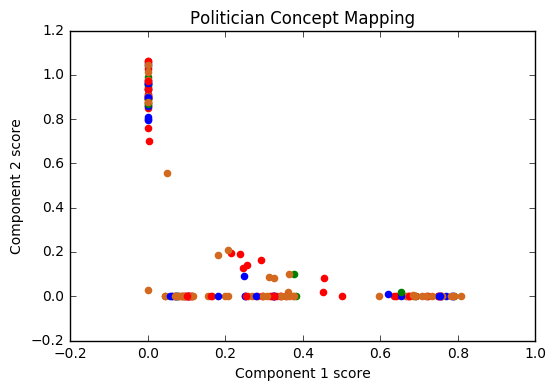

In [23]:
plt.figure(1)
plt.title("Politician Concept Mapping")
x = H[0,:]
y = H[1,:]
color_dict = {4:'chocolate', 2:'red', 1:'blue', 6:'green'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
j=0
for i,c in enumerate(good_dict):
    plt.scatter(H[0,:][i], H[1,:][i], color=color_dict[party_dict[good_dict[c]]])

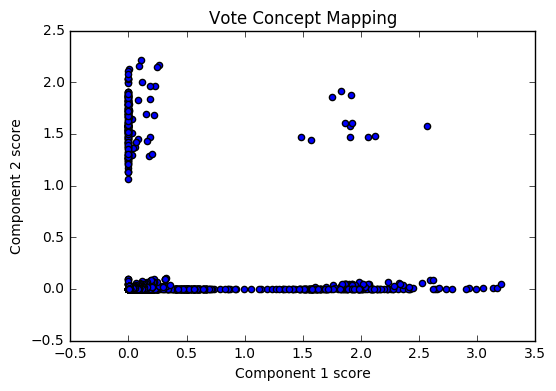

In [24]:
plt.title("Vote Concept Mapping")
x = W[:,0]
y = W[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [63]:
model = NMF(n_components=150, init='random', random_state=0)
W = model.fit_transform(clean_df)
H = model.components_

In [64]:
H.shape

(150, 170)

In [65]:
from sklearn.metrics import mean_squared_error

nR = np.dot(W,H)
mean_squared_error(clean_df.values.flatten(), list(nR.flatten()))

0.0021106392352832639

In [66]:
from sklearn.manifold import TSNE

In [67]:
W_embedded = TSNE(n_components=2).fit_transform(W)
H_embedded = TSNE(n_components=2).fit_transform(H)

In [130]:
H_embedded.shape, W_embedded.shape

((150, 2), (1718, 2))

In [131]:
plt.style.use('ggplot')

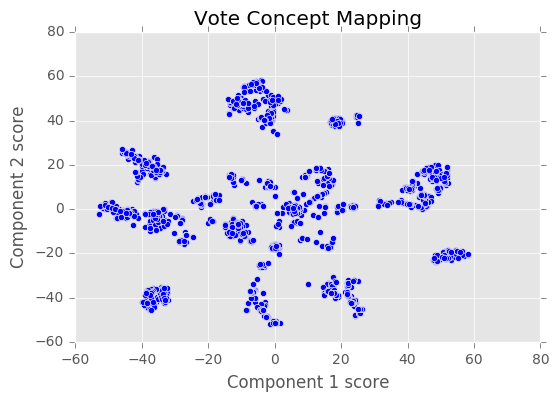

In [132]:
plt.figure(1)
plt.title("Vote Concept Mapping")
x = W_embedded[0,:]
y = W_embedded[1,:]
color_dict = {4:'chocolate', 2:'red', 1:'blue', 6:'green'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")


plt.scatter(W_embedded[:,0], W_embedded[:,1])

In [133]:
#for idx, row in clean_df.iterrows():
    #print(idx)
abc_df = clean_df.rename(columns=party_dict)
#for column in abc_df:
#    abc_df['UDC'] = 
voter_pattern_df = pd.DataFrame()
voter_pattern_df['UDC'] = (abc_df[4][abc_df[4] == 2.0].count(axis=1) > 0)
voter_pattern_df['PS'] = (abc_df[2][abc_df[2] == 2.0].count(axis=1) > 0)
voter_pattern_df['PLR'] = (abc_df[1][abc_df[1] == 2.0].count(axis=1) > 0)
voter_pattern_df['Verts'] = (abc_df[6][abc_df[6] == 2.0].count(axis=1) > 0)

voter_pattern_df = voter_pattern_df.astype(int)

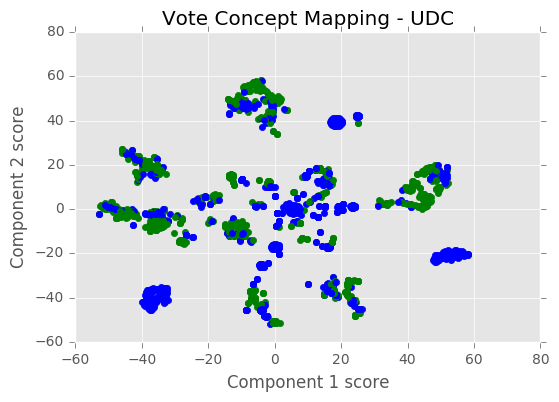

In [134]:
# Exemple UDC
plt.figure(1)
plt.title("Vote Concept Mapping - UDC")
x = W_embedded[0,:]
y = W_embedded[1,:]
color_dict = {0:'blue', 1:'green'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")

for i,c in enumerate(voter_pattern_df['UDC']):
    plt.scatter(W_embedded[:,0][i], W_embedded[:,1][i], color=color_dict[voter_pattern_df['UDC'].iloc[i]])


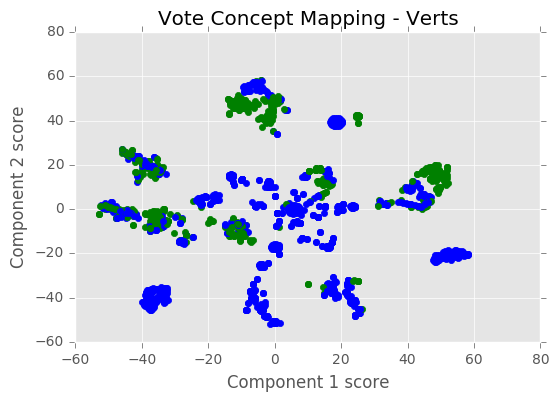

In [135]:
# Exemple Verts
plt.figure(1)
plt.title("Vote Concept Mapping - Verts")
x = W_embedded[0,:]
y = W_embedded[1,:]
color_dict = {0:'blue', 1:'green'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")

for i,c in enumerate(voter_pattern_df['Verts']):
    plt.scatter(W_embedded[:,0][i], W_embedded[:,1][i], color=color_dict[voter_pattern_df['Verts'].iloc[i]])

In [136]:
voter_pattern_df['UDC/Verts'] = abs(voter_pattern_df['UDC'] - voter_pattern_df['Verts'])
voter_pattern_df

,UDC,PS,PLR,Verts,UDC/Verts
17496,0,1,1,1,1
17983,1,0,1,0,1
17209,1,0,1,0,1
16362,0,1,1,1,1
17533,0,1,1,1,1
17534,1,0,1,0,1
17815,1,0,0,0,1
17816,0,1,1,1,1
17910,0,1,1,1,1
17911,0,1,1,1,1


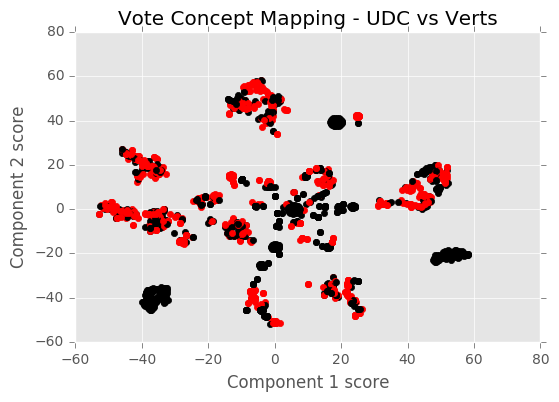

In [137]:
# Exemple Verts
plt.figure(1)
plt.title("Vote Concept Mapping - UDC vs Verts")
x = W_embedded[0,:]
y = W_embedded[1,:]
color_dict = {0:'black', 1:'red'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")

for i,c in enumerate(voter_pattern_df['UDC/Verts']):
    plt.scatter(W_embedded[:,0][i], W_embedded[:,1][i], color=color_dict[voter_pattern_df['UDC/Verts'].iloc[i]])

In [138]:
voter_pattern_df['PS/Verts'] = abs(voter_pattern_df['PS'] - voter_pattern_df['Verts'])
voter_pattern_df

,UDC,PS,PLR,Verts,UDC/Verts,PS/Verts
17496,0,1,1,1,1,0
17983,1,0,1,0,1,0
17209,1,0,1,0,1,0
16362,0,1,1,1,1,0
17533,0,1,1,1,1,0
17534,1,0,1,0,1,0
17815,1,0,0,0,1,0
17816,0,1,1,1,1,0
17910,0,1,1,1,1,0
17911,0,1,1,1,1,0


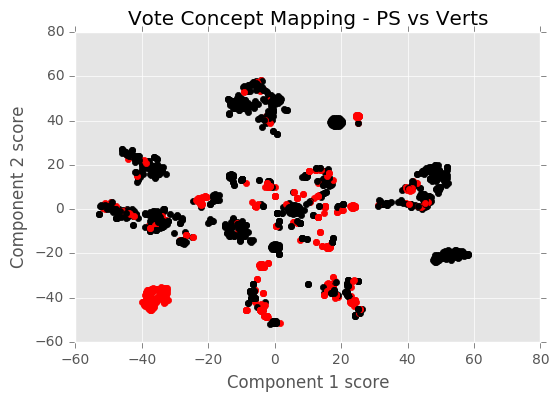

In [139]:
# Exemple Verts
plt.figure(1)
plt.title("Vote Concept Mapping - PS vs Verts")
x = W_embedded[0,:]
y = W_embedded[1,:]
color_dict = {0:'black', 1:'red'}
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")

for i,c in enumerate(voter_pattern_df['PS/Verts']):
    plt.scatter(W_embedded[:,0][i], W_embedded[:,1][i], color=color_dict[voter_pattern_df['PS/Verts'].iloc[i]])

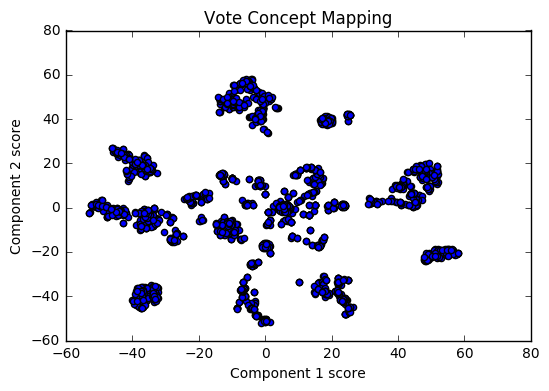

In [123]:
plt.title("Vote Concept Mapping")
x = W_embedded[:,0]
y = W_embedded[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
plt.show()

In [ ]:
#SVD
import numpy as np
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(clean_df - np.mean(clean_df), k = 5)

In [ ]:
U.shape, Vt.shape

In [ ]:
plt.title("Politician Concept Mapping")
x = Vt[0,:]
y = Vt[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i,c in enumerate(total_list):
    plt.annotate(c, (Vt[0,:][i], Vt[1,:][i]))
plt.show()